1.   Why is your proposal important in today’s world?
<br>
Ans : Well in India the base price for testing corona is around 550 for individual , Now if we do some maths with the total population 550 * 100 cr = 55,000 cr rupees , Now this is quite a huge investment , So what we are doing is to minimize the cost by narrowing down the covid positive people


2.  How predicting a disease accurately can improve medical treatment?  How is it going to impact the medical field when it comes to effective screening and reducing health care burden. <br>
Ans : Predicting a disease accurately can improve medical treatment for each individual to save his life , I can't say more than this what our main objective is saving a life and I do what can to help

The burden of hospitals can be dramatically reduced if the covid negative patients were removed from the hospital so we can stop further spreading the disease and increase space for the infected people


3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.<br>

Ans : When I have completed building the model I can say that we are missing many features to build the model like what was given was only basic details with these I cannot achieve a perfect model , Inorder to build a best model and not risk any persons life this features might be needed

1. Accurate Age
2. Past 2 Weeks activities in detail description ( NLP can be used )
3. Previously any diseases or Infections
4. BMI
5. Hemorrhoids and vitamin A levels (based on internet Sources )

Cautious : This model cannot be used for any other diseases other than corona

Section 2: Initial Hypothesis (or hypotheses)

Here you have to make some assumptions based on the questions you want to address based on the DA track or ML track.

If DA track please aim to identify patterns in the data and important features that may impact a ML model.

Ans : As far as domain knowledge covid 19 was said to have a significant increase in cases around Decemeber and january So we need to extract months from the date column , In EDA I found that Fever and Cough are highly correlated with the Positive Cases

If ML track please perform part ‘i’ as well as multiple machine learning models, perform all required steps to check if there are any assumptions and justify your model. Why is your model better than any other possible model? Please justify it by relevant cost functions and if possible by any graph.

Ans : I have done all this in the notebook itself and explained every detail below the cell

From step 1, you may see some relationship that you want to explore and will develop a belief about data.



Section 4: Machine learning approach

1. What method will you use for machine learning based predictions of COVID19?<br>
Ans : I have used Random Forest to Predict Covid19

2. Please justify the most appropriate model.<br>
Ans : In the EDA I found that data is not linearly related , So I went for tree based models

3. Please perform necessary steps required to improve the accuracy of your model.<br>
Ans : I have used Grid search cv and Random Search cv for hyperparameter Tuning and Performed Precision/Recall Curve for selecting the best threshold

4. Please compare all models (at least 4  models). <br>
Ans : I have compared LR , SVM , DT , RF , XGBOOST



To solve imbalanced datasets like this use ensemble
methods like smote and also use multiple models like RF,XGB , SVM , LOR

---

Notes:

1.   you need to take care of the Age column which I have removed  (use r2 square to determine the columns importance )
2.   List item



In [1]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from google.colab import drive
import pandas as pd , plotly.express as px , numpy as np
drive.mount('/content/drive')
corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")
corona_data.head()

Mounted at /content/drive


<ipython-input-1-1d927504dc7c>:16: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")


Ind_ID   Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1  11-03-2020           TRUE  FALSE        TRUE               FALSE   
1       2  11-03-2020          FALSE   TRUE       FALSE               FALSE   
2       3  11-03-2020          FALSE   TRUE       FALSE               FALSE   
3       4  11-03-2020           TRUE  FALSE       FALSE               FALSE   
4       5  11-03-2020           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [ ]:
df = corona_data
start_date = '11-03-2020'
end_date = '15-04-2020'
train_data = df[(df['Test_date'] >= start_date) & (df['Test_date'] <= end_date)]
test_data = df[~((df['Test_date'] >= start_date) & (df['Test_date'] <= end_date))]

In [ ]:
train_data.shape

(35678, 11)

In [ ]:
df.shape

(278848, 11)

As we can see the size of the test set is significantly small compared to test set so I am not cosidering splitting the dataset based on the dataset , Well mostly Splitting the dataset according to date is only useful for time series datasets , but corona dataset as per domain knowledge is not timeseries it is based on no.of people you have been in contact with

In [ ]:
corona_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


we can see that there are no missing values aside from Test_date column other columns seems to be in the right format , But based on previous column corona_data.head() I can see that instead of Nan values it is filled with None value so let's replace that

In [ ]:
corona_data.shape

(278848, 11)

In [ ]:
corona_data.replace("None",np.nan,inplace=True)
corona_data.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

As we can see there are many missing values in Age_60_above and sex column <br> As per the remaining Cough and fever column it is fine to fill them using mode <br> Fortunately there aren't any missing values in the target column so we can create the test data right now for the end results

In [2]:
data=corona_data.copy()

In [ ]:
print(data.shape)

(278848, 11)


In [ ]:
print(data['Corona'].value_counts(normalize=True))

negative    0.933223
positive    0.052820
other       0.013957
Name: Corona, dtype: float64
negative    0.933216
positive    0.052826
other       0.013958
Name: Corona, dtype: float64


## Exploratory Data Analysis

let's go sequence wise <br>
We will first extract all possible variations from date column

convert the test_date column to date format <br> As per the given details the year is same 2020 so there is no
need of year column separately simillary day

In [3]:

data['Test_date'] = pd.to_datetime(data['Test_date'])
data['month'] = data['Test_date'].dt.month
data['day'] = data['Test_date'].dt.day
data['year'] = data['Test_date'].dt.year
data['week_of_year'] = data['Test_date'].dt.week
data.head()

<ipython-input-3-9942aafe9b8e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Test_date'] = pd.to_datetime(data['Test_date'])
<ipython-input-3-9942aafe9b8e>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week_of_year'] = data['Test_date'].dt.week


Ind_ID  Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1 2020-11-03           TRUE  FALSE        TRUE               FALSE   
1       2 2020-11-03          FALSE   TRUE       FALSE               FALSE   
2       3 2020-11-03          FALSE   TRUE       FALSE               FALSE   
3       4 2020-11-03           TRUE  FALSE       FALSE               FALSE   
4       5 2020-11-03           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  month  day  \
0    FALSE  negative         None  None                  Abroad     11    3   
1    FALSE  positive         None  None                  Abroad     11    3   
2    FALSE  positive         None  None                  Abroad     11    3   
3    FALSE  negative         None  None                  Abroad     11    3   
4    FALSE  negative         None  None  Contact with confirmed     11    3   

   year  week_of_year  
0  2020            45  
1  2020            45  
2  2020            45  
3  2020            45  
4  2020            45

In [4]:
# let's fill the cough symptoms and fever column using mode , we will check this using various methods like knn at the end
data['Cough_symptoms'] = data['Cough_symptoms'].fillna(data['Cough_symptoms'].mode()[0])
data['Fever'] = data['Fever'].fillna(data['Fever'].mode()[0])
data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])

In [5]:
data['Age_60_above'].value_counts()  # 278848

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [ ]:
# total missing values in Age_60_above is
278848 - (109538+22422)

# since there are many missing values we will decide weather to drop it or not using the ensemble method column importance

146888

Since all of the data are categorical we cannot do much analysis execpt their ratio , where as if they are numerical we have to check different types like outliers , type of distribution .. etc

In [ ]:
data['Corona'].value_counts(normalize=True)

negative    0.933223
positive    0.052820
other       0.013957
Name: Corona, dtype: float64

These looks like an imbalanced dataset with only 5% positive classes and as per the "other" type I would consider them as negative class cause in the data description it was only mentioned as either positive or negative and since the goal was to find positive classes for corona and other types of fever would be considered as non-corona patients so I am counting them as negative

In [6]:
data['Corona'] = data['Corona'].apply(lambda x: 'negative' if x=='other' else x)
data['Corona'].value_counts(normalize=True)

negative    0.947179
positive    0.052821
Name: Corona, dtype: float64

In [ ]:
data['Cough_symptoms'].value_counts()

False    111130
FALSE     94649
TRUE      19122
True      17696
Name: Cough_symptoms, dtype: int64

In [7]:

for i in ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Age_60_above", "Sex", "Known_contact"]:
  print('for value : ',i)
  print(data[i].value_counts())
  print(39*'--')

for value :  Cough_symptoms
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
------------------------------------------------------------------------------
for value :  Fever
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
------------------------------------------------------------------------------
for value :  Sore_throat
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
------------------------------------------------------------------------------
for value :  Shortness_of_breath
False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
------------------------------------------------------------------------------
for value :  Headache
False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: i

In [8]:
# there are many true false typo errors , These is just for analysis I will change it to one-hot encoding
# after the EDA process
def change_column(given_value):
  if given_value==True or given_value=="TRUE" or given_value=='Contact with confirmed' or given_value=='Yes' or given_value=='male':
    return 1
  elif given_value == False or given_value == "FALSE" or given_value=='female' or given_value=='Abroad' or given_value=='No':
    return 0
  elif given_value=='Other':
    return 2
  else:
    return given_value
for change_values in ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Age_60_above", "Sex", "Known_contact"]:
  data[change_values] = data[change_values].apply(lambda x: change_column(x))

In [ ]:
data

Ind_ID  Test_date  Cough_symptoms  Fever  Sore_throat  \
69556    69557 2020-01-04               0      0            0   
90156    90157 2020-03-04               0      0            0   
97356    97357 2020-04-04               1      1            0   
235416  235417 2020-04-23               0      0            0   
60166    60167 2020-03-30               0      0            0   
...        ...        ...             ...    ...          ...   
45439    45440 2020-03-28               0      0            0   
214487  214488 2020-04-21               0      0            0   
64511    64512 2020-03-31               0      0            0   
45013    45014 2020-03-28               1      1            0   
249888  249889 2020-04-26               0      0            0   

        Shortness_of_breath  Headache    Corona  Age_60_above  Sex  \
69556                     0         0  negative           0.0    1   
90156                     0         0  negative           0.0    0   
97356                     0         0  positive           1.0    1   
235416                    0         0  negative           NaN    1   
60166                     0         0  negative           0.0    0   
...                     ...       ...       ...           ...  ...   
45439                     0         0  negative           0.0    0   
214487                    0         0  negative           NaN    0   
64511                     0         0  negative           0.0    1   
45013                     0         0  positive           0.0    1   
249888                    0         0  negative           NaN    1   

        Known_contact  month  day  year  week_of_year  
69556               2      1    4  2020             1  
90156               2      3    4  2020            10  
97356               1      4    4  2020            14  
235416              2      4   23  2020            17  
60166               2      3   30  2020            14  
...               ...    ...  ...   ...           ...  
45439               2      3   28  2020            13  
214487              2      4   21  2020            17  
64511               2      3   31  2020            14  
45013               2      3   28  2020            13  
249888              2      4   26  2020            17  

[242597 rows x 15 columns]

In [ ]:
for i in ['day','week_of_year','month']:
  px.histogram(data, x=i, color='Corona').show()

Based on the above images I think I should learn the concept of pca before removing the irrelevant columns also see the random forest column contribution before removing

In [ ]:
# we can see that fever is correlated with positive cases
px.histogram(data, x='Corona', color='Fever').show()

In [ ]:
data.drop(columns=['Ind_ID', 'Test_date','year','day'],inplace=True)

In [ ]:
# As for now let's drop this and see it in the future
Age_60_column = data["Age_60_above"]
data.drop(columns="Age_60_above",inplace=True)

In [ ]:
sample = data.copy()
sample['Corona']= sample['Corona'].apply(lambda x: 0 if x=='negative' else 1)
sample.corrwith(sample['Corona'])

Cough_symptoms         0.194321
Fever                  0.265304
Sore_throat            0.274269
Shortness_of_breath    0.230593
Headache               0.365165
Corona                 1.000000
Sex                    0.021643
Known_contact         -0.210197
month                 -0.009501
week_of_year          -0.014494
dtype: float64

As per the correlations we can see that there isn't any noticeable relationships <br> This is completely fine considering we are going to use tree based algorithms

In [ ]:
for i in ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath','Headache','Sex', 'Known_contact']:
  print(pd.crosstab(data['Corona'], data[i]))
  print(50*'--')

Cough_symptoms       0      1
Corona                       
negative        198693  31090
positive          7086   5728
----------------------------------------------------------------------------------------------------
Fever          0      1
Corona                 
negative  215692  14091
positive    7949   4865
----------------------------------------------------------------------------------------------------
Sore_throat       0     1
Corona                   
negative     229430   353
positive      11494  1320
----------------------------------------------------------------------------------------------------
Shortness_of_breath       0     1
Corona                           
negative             229423   360
positive              11804  1010
----------------------------------------------------------------------------------------------------
Headache       0     1
Corona                
negative  229630   153
positive   10868  1946
------------------------------------------------

As we can see from the table that aside from gender all other columns seems to play an important role in predicting target column <br> Mostly breath_shortness , known_contacts and headache are playing a major role

### Let's check some hypothesis , I want to know weather men are likely to get infected or not

In [23]:
from scipy import stats
infected_men = data[(data['Sex'] == 1) & (data['Corona']=='positive')].shape[0]
total_men = data[data['Sex'] == 1].shape[0]
prop_men = infected_men / total_men

infected_women = data[(data['Sex'] == 0) & (data['Corona']=='positive')].shape[0]
total_women = data[data['Sex'] == 0].shape[0]
prop_women = infected_women / total_women
contingency_table = [[infected_men, total_men - infected_men], [infected_women, total_women - infected_women]]
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There's evidence suggesting men are more likely to be infected.")
else:
     print("Fail to reject the null hypothesis. Not enough evidence for a Sex difference in infection rates.")


Reject the null hypothesis. There's evidence suggesting men are more likely to be infected.


Section 3: Data analysis approach

1. What approach are you going to take in order to prove or disprove your hypothesis?

Ans : I am using P value to reject the hypothesis that men are most likely to get infected compared to women

2. What feature engineering techniques will be relevant to your project?

Ans : There is date column in dataset from which I have extracted the month , day and every possible variation and after exploring a bit further I have removed everything expect month , Since there aren't many numericals or much variants in each column the only valid explanations seems cross tab

3. Please justify your data analysis approach.

Ans : Most of the data is just true/false so this basic eda is fine like performing bivariate analysis between each column relation to target column  


# Model Building

In [ ]:
data.dropna(inplace=True)

In [ ]:
model = data.copy()
model_target = data['Corona']
model.drop(columns=['Corona'],inplace=True)
x_train,y_train,x_test,y_test = train_test_split(model,model_target,random_state=42,train_size=0.87,stratify=model_target)

In [ ]:
data.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
Known_contact          0
month                  0
week_of_year           0
dtype: int64

In [ ]:
x_train

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
199574               0      0            0                    0         0   
262559               1      0            0                    0         0   
133896               0      0            0                    0         0   
99993                0      1            0                    0         0   
108341               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
42645                0      0            0                    0         0   
272796               0      0            0                    0         0   
239175               1      0            0                    0         0   
67744                0      0            0                    0         0   
182259               0      0            0                    0         0   

        Sex  Known_contact  month  week_of_year  
199574    1              2      4            17  
262559    1              0      4            18  
133896    0              2     11            45  
99993     1              0      5            19  
108341    0              0      6            23  
...     ...            ...    ...           ...  
42645     0              2      3            13  
272796    1              2      4            18  
239175    1              2      4            17  
67744     1              2      1             1  
182259    0              2      4            16  

[211059 rows x 9 columns]

In [ ]:
x_train.columns

Index(['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath',
       'Headache', 'Sex', 'Known_contact', 'month', 'week_of_year'],
      dtype='object')

In [ ]:
x_test

199574    negative
262559    negative
133896    positive
99993     negative
108341    negative
            ...   
42645     negative
272796    negative
239175    negative
67744     negative
182259    negative
Name: Corona, Length: 211059, dtype: object

Let's use Stochastic gradient descent for now to find the best measure for this type of problem

---



In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train,x_test)
sgd_clf.predict(x_train[:1])

array(['negative'], dtype='<U8')

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, x_test, cv=4, scoring="accuracy")

array([0.95775609, 0.95771818, 0.9564105 , 0.95762262])

The accuracy is showing nearly 96% <br> But we know this ain't true cause the dataset is imbalanced and we need another way to measure accuracy <br> The errors in this dataset can be proved using dumb classifier

In [ ]:
from sklearn.base import BaseEstimator
class Dumb_Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return ['negative'] * len(X)  # Return 'negative' for each instance in X

test = Dumb_Classifier()
cross_val_score(test, x_train, x_test, cv=4, scoring="accuracy")

array([0.946745  , 0.94697242, 0.94788212, 0.94712304])

See even if I give answer as negative all the time it still gives me a score of 94%

In [ ]:
# let's see how confusion matrix handles this

model_predictions = sgd_clf.predict(x_train)
model_predictions

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

In [ ]:
confusion_matrix(x_test,model_predictions)

array([[199388,    523],
       [  8458,   2690]])

We can see that model isn't even performing to base value it is performing much worse



---


let's conform that


In [ ]:
print('recall score : ',recall_score(x_test, model_predictions,pos_label='positive'))
print('precision score : ',precision_score(x_test, model_predictions,pos_label='positive'))

recall score :  0.2412988876928597
precision score :  0.837223778400249


Since we are dealing with medical diseases it is highly important to classify postive people as positive cases

<br>

So our model should have more recall than precision , cause even if some people get false messages as corona positive they will go to the hospital and give a blood test to check thoroughly rather than basic symptoms like fever and cough , On the flip side we can save people who really have corona to get treated

In [ ]:
y_scores = cross_val_predict(sgd_clf,x_train,x_test,cv=3,method="decision_function")

In [ ]:
# now let's plot the pr curve
def trade_off(threshold):
  y_pred = []
  for i in y_scores:
    if i>threshold:
      y_pred.append('positive')
    else:
      y_pred.append('negative')
  precision_value = precision_score(x_test,y_pred,pos_label='positive')
  recall_value = recall_score(x_test, y_pred,pos_label='positive')
  return (precision_value,recall_value)

In [ ]:
print(max(y_scores),min(y_scores))

6.139767483966286 -4.033522544965098


In [ ]:
trade_off(0)

(0.8282703037817731, 0.2396842482956584)

In [ ]:
precision_scores =[]
recall_scores =[]
plot_range = np.arange(-3.880,6.230,0.5)
for i in plot_range: # since it will take long time for to check every single value I am checking every 0.5 values after
  x,y=trade_off(i)
  precision_scores.append(x)
  recall_scores.append(y)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Scatter(x=plot_range, y=precision_scores, mode='lines', name='Precision', line=dict(color='red')))
fig.add_trace(go.Scatter(x=plot_range, y=recall_scores, mode='lines', name='Recall', line=dict(color='blue')))
fig.update_layout(title='Precision and Recall Scores Across Thresholds',xaxis_title='Threshold',yaxis_title='Score')
fig.update_layout(legend=dict(yanchor="top",y=0.99,xanchor="left",x=0.01))
fig.show()

In [ ]:
# let's check with different models ,
# let's use Random Forest
# pr curve and pr auc on an imbalanced dataset

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(x_train, x_test)

RandomForestClassifier(random_state=42)

In [ ]:
prediction_scores = rf_clf.predict_proba(x_train)
print("Prediction Scores Shape:", prediction_scores.shape)

Prediction Scores Shape: (211059, 2)


In [ ]:
rf_predicted = rf_clf.predict(x_train)

In [ ]:
confusion_matrix(x_test,rf_predicted) # compared to SGD , RF is performing well

array([[198164,   1747],
       [  4337,   6811]])

In [ ]:

# plot no skill and model precision-recall curves
def plot_pr_curve(model_name,given_models):
	# plot model precision-recall curve
  for i,j in zip(given_models,model_name):
    precision, recall, _ = precision_recall_curve(y_test, i,pos_label='positive')
    pyplot.plot(recall, precision, marker='^', label=j)
  pyplot.xlabel('Recall')
  pyplot.ylabel('Precision')
  pyplot.legend()
  pyplot.show()


In [ ]:
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, x_test)
yhat = model.predict_proba(y_train)
model_probs = yhat[:, 1]

In [ ]:
prediction_scores = rf_clf.predict_proba(y_train)

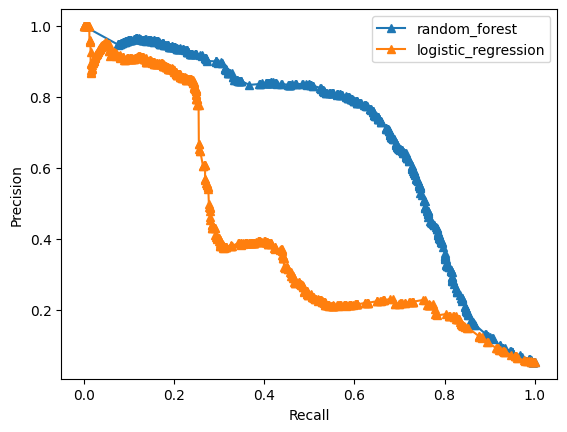

In [ ]:
test_1 = prediction_scores[:,1]
plot_pr_curve(['random_forest','logistic_regression'],[test_1,model_probs])

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
sample_x_test = x_test.apply(lambda x: 1 if x=='positive' else 0)
xgb_model.fit(x_train, sample_x_test)
test_2 = model.predict_proba(y_train)
test_2

array([[0.97430756, 0.02569244],
       [0.96243615, 0.03756385],
       [0.97692201, 0.02307799],
       ...,
       [0.72566657, 0.27433343],
       [0.97692201, 0.02307799],
       [0.95497195, 0.04502805]])

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(probability=True)  # Setting probability=True to enable probability estimates
svm_model.fit(x_train, x_test)
y_pred_proba_svm = svm_model.predict_proba(y_train)
y_pred_proba_svm

In [ ]:
x_train # don't wanna do a play date with you oo kadha asai

Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
199574               0      0            0                    0         0   
262559               1      0            0                    0         0   
133896               0      0            0                    0         0   
99993                0      1            0                    0         0   
108341               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
42645                0      0            0                    0         0   
272796               0      0            0                    0         0   
239175               1      0            0                    0         0   
67744                0      0            0                    0         0   
182259               0      0            0                    0         0   

        Sex  Known_contact  month  week_of_year  
199574    1              2      4            17  
262559    1              0      4            18  
133896    0              2     11            45  
99993     1              0      5            19  
108341    0              0      6            23  
...     ...            ...    ...           ...  
42645     0              2      3            13  
272796    1              2      4            18  
239175    1              2      4            17  
67744     1              2      1             1  
182259    0              2      4            16  

[211059 rows x 9 columns]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, x_test)
y_pred_proba_knn = knn_model.predict_proba(y_train)
y_pred_proba_knn

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(x_train, x_test)
y_pred_proba_nb = nb_model.predict_proba(y_train)
y_pred_proba_nb

array([[9.99994833e-01, 5.16656362e-06],
       [9.99993948e-01, 6.05217128e-06],
       [9.99995681e-01, 4.31888096e-06],
       ...,
       [1.75138227e-01, 8.24861773e-01],
       [9.99995681e-01, 4.31888096e-06],
       [9.99112331e-01, 8.87668614e-04]])

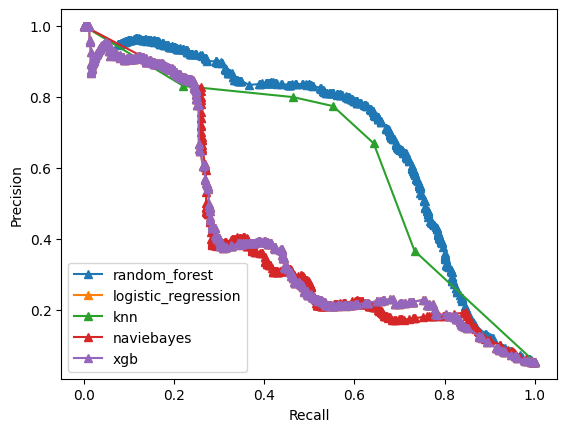

In [ ]:
plot_pr_curve(['random_forest','logistic_regression','knn','naviebayes','xgb'],[test_1,model_probs,y_pred_proba_knn[:,1],y_pred_proba_nb[:,1],test_2[:,1]])

looks like out of all only random forest and knn are performing better

---

with this we can say that the data is not a linearly seperable one only tree type models are suitable for them

## Model evaluation and hyperparameter tuning

In [ ]:
def change_column(given_value):
  if given_value==True or given_value=="TRUE":
    return 1
  else:
    return 0

def data_transformation(data):
  data.replace("None",np.nan,inplace=True)
  data['month'] = data['Test_date'].dt.month
  data['Cough_symptoms'] = data['Cough_symptoms'].fillna(data['Cough_symptoms'].mode()[0])
  data['Fever'] = data['Fever'].fillna(data['Fever'].mode()[0])
  data['Sex'] = data['Sex'].fillna(data['Sex'].mode()[0])
  data['Corona'] = data['Corona'].apply(lambda x: 'negative' if x=='other' else x)
  # perform true false errors for values
  for change_values in ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]:
    data[change_values] = data[change_values].apply(lambda x: change_column(x))
  # perform pandas dummies for values
  data = pd.get_dummies(data, columns=['Sex', 'Known_contact','month'])
  data.drop(columns=['Ind_ID', 'Test_date','Age_60_above','Sex_female'],axis=1,inplace=True) # dropping Sex_female column to avoid multicollinearity
  data.dropna(inplace=True)
  return data

corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")
corona_data['Test_date'] = pd.to_datetime(corona_data['Test_date'])
training_data = (corona_data['Test_date'] >= '2024-01-01') & (corona_data['Test_date'] < '2025-01-01')
temp_data , test = train_test_split(corona_data,random_state=42,train_size=0.87,stratify=corona_data['Corona'])
data = data_transformation(temp_data)
data_target = data['Corona']
data.drop(columns=['Corona'],inplace=True)
data

<ipython-input-4-2c6689160c5c>:24: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")
<ipython-input-4-2c6689160c5c>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Test_date'] = pd.to_datetime(data['Test_date'])


Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
69556                0      0            0                    0         0   
90156                0      0            0                    0         0   
97356                1      1            0                    0         0   
235416               0      0            0                    0         0   
60166                0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
45439                0      0            0                    0         0   
214487               0      0            0                    0         0   
64511                0      0            0                    0         0   
45013                1      1            0                    0         0   
249888               0      0            0                    0         0   

        Sex_male  Known_contact_Abroad  Known_contact_Contact with confirmed  \
69556          1                     0                                     0   
90156          0                     0                                     0   
97356          1                     0                                     1   
235416         1                     0                                     0   
60166          0                     0                                     0   
...          ...                   ...                                   ...   
45439          0                     0                                     0   
214487         0                     0                                     0   
64511          1                     0                                     0   
45013          1                     0                                     0   
249888         1                     0                                     0   

        Known_contact_Other  month_1  ...  month_3  month_4  month_5  month_6  \
69556                     1        1  ...        0        0        0        0   
90156                     1        0  ...        1        0        0        0   
97356                     0        0  ...        0        1        0        0   
235416                    1        0  ...        0        1        0        0   
60166                     1        0  ...        1        0        0        0   
...                     ...      ...  ...      ...      ...      ...      ...   
45439                     1        0  ...        1        0        0        0   
214487                    1        0  ...        0        1        0        0   
64511                     1        0  ...        1        0        0        0   
45013                     1        0  ...        1        0        0        0   
249888                    1        0  ...        0        1        0        0   

        month_7  month_8  month_9  month_10  month_11  month_12  
69556         0        0        0         0         0         0  
90156         0        0        0         0         0         0  
97356         0        0        0         0         0         0  
235416        0        0        0         0         0         0  
60166         0        0        0         0         0         0  
...         ...      ...      ...       ...       ...       ...  
45439         0        0        0         0         0         0  
214487        0        0        0         0         0         0  
64511         0        0        0         0         0         0  
45013         0        0        0         0         0         0  
249888        0        0        0         0         0         0  

[242597 rows x 21 columns]

In [ ]:
# now we need to use grid search cv to find the best fit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [30, 10, 20]
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
scorer = make_scorer(f1_score, pos_label='positive')
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=4, scoring='accuracy')
grid_search.fit(data, data_target)
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy:", test_accuracy)


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=3, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(data,data_target)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits


KeyboardInterrupt: 

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=80,min_samples_split=20)
predicted_probabilities = cross_val_predict(rf_clf, data, data_target, cv=5, method='predict_proba')

In [ ]:
predicted_probabilities

array([[0.98756147, 0.01243853],
       [0.99443604, 0.00556396],
       [0.26234125, 0.73765875],
       ...,
       [0.98776884, 0.01223116],
       [0.61199773, 0.38800227],
       [0.98854285, 0.01145715]])

In [ ]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import precision_recall_curve

# Compute precision and recall
precision, recall, thresholds = precision_recall_curve(data_target, predicted_probabilities[:,1],pos_label='positive')

# Create a DataFrame with precision, recall, and threshold values
df = pd.DataFrame({'Precision': precision[:-1], 'Recall': recall[:-1], 'Threshold': thresholds})

# Create a scatter plot with hover text for thresholds
fig = go.Figure()

# Add scatter plot with hover text
fig.add_trace(go.Scatter(x=df['Recall'], y=df['Precision'], mode='markers', text=df['Threshold'],
                         hovertemplate='Recall: %{x}<br>Precision: %{y}<br>Threshold: %{text}',
                         marker=dict(size=10), name='Precision-Recall'))

# Add line plot to connect the points
fig.add_trace(go.Scatter(x=recall, y=precision, mode='lines', name='PR Curve'))

# Update layout
fig.update_layout(title='Precision-Recall Curve with Thresholds',
                  xaxis_title='Recall',
                  yaxis_title='Precision',
                  hovermode='closest')

# Show the plot
fig.show()


looks like threshold = 0.05 is the best choice considering we have to save as many patients as we can

In [ ]:
# let's create a proper test set
test = data_transformation(test)
test_target = test['Corona']
test.drop(columns=['Corona'],inplace=True)
test

<ipython-input-4-2c6689160c5c>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Test_date'] = pd.to_datetime(data['Test_date'])


Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
147066               0      0            0                    0         0   
33307                0      0            0                    0         0   
223984               0      0            0                    0         0   
263618               0      0            0                    0         0   
144037               0      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
103993               0      0            0                    0         0   
116815               1      0            0                    0         0   
117388               0      0            0                    0         0   
199160               0      0            0                    0         0   
97420                1      1            0                    0         0   

        Sex_male  Known_contact_Abroad  Known_contact_Contact with confirmed  \
147066         0                     0                                     0   
33307          1                     0                                     0   
223984         0                     0                                     0   
263618         0                     0                                     0   
144037         1                     0                                     0   
...          ...                   ...                                   ...   
103993         1                     0                                     0   
116815         0                     0                                     0   
117388         0                     0                                     0   
199160         0                     0                                     0   
97420          0                     0                                     0   

        Known_contact_Other  month_1  ...  month_3  month_4  month_5  month_6  \
147066                    1        0  ...        0        1        0        0   
33307                     1        0  ...        1        0        0        0   
223984                    1        0  ...        0        1        0        0   
263618                    1        0  ...        0        1        0        0   
144037                    1        0  ...        0        1        0        0   
...                     ...      ...  ...      ...      ...      ...      ...   
103993                    1        0  ...        0        0        1        0   
116815                    1        0  ...        0        0        0        0   
117388                    1        0  ...        0        0        0        0   
199160                    1        0  ...        0        1        0        0   
97420                     1        0  ...        0        1        0        0   

        month_7  month_8  month_9  month_10  month_11  month_12  
147066        0        0        0         0         0         0  
33307         0        0        0         0         0         0  
223984        0        0        0         0         0         0  
263618        0        0        0         0         0         0  
144037        0        0        0         0         0         0  
...         ...      ...      ...       ...       ...       ...  
103993        0        0        0         0         0         0  
116815        0        1        0         0         0         0  
117388        0        1        0         0         0         0  
199160        0        0        0         0         0         0  
97420         0        0        0         0         0         0  

[36251 rows x 21 columns]

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_depth=80,min_samples_split=20)
rf_clf.fit(data, data_target)
test_prediction = rf_clf.predict_proba(test)
test_prediction

array([[0.99109347, 0.00890653],
       [0.98785326, 0.01214674],
       [0.99109347, 0.00890653],
       ...,
       [0.98577455, 0.01422545],
       [0.99109347, 0.00890653],
       [0.94397829, 0.05602171]])

In [ ]:
def value_changes(n):
  threshold = 0.05
  if n>threshold:
    return 'positive'
  else:
    return 'negative'
y_pred = []
for i in test_prediction[:,1]:
  y_pred.append(value_changes(i))
print(confusion_matrix(test_target,y_pred))
# y_pred = (test_prediction[:, 1] >= threshold).astype('int')
print('recall score : ',recall_score(test_target, y_pred,pos_label='positive'))
print('precision score : ',precision_score(test_target, y_pred,pos_label='positive'))

[[31715  2621]
 [  382  1533]]
recall score :  0.8005221932114882
precision score :  0.36904188733750604


### As we can see from the results that we could save a person almost 80% of the time , Yes we have quite a bit of precision error but this the path we opted for

## This method would not be useful in real data considering the lack of columns in it

# Database Questions

### Before I send them to database I need to correct some minute errors so it will be easy in sql syntax

In [ ]:
from google.colab import drive
import pandas as pd , plotly.express as px , numpy as np
drive.mount('/content/drive')
corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")
corona_data.head()
boolean_values = ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache","Corona","Age_60_above","Sex","Known_contact"]
for i in boolean_values:
  print(i,' these hase these many different values ')
  print(corona_data[i].value_counts())
  print(89*"--")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-3-21a743116173>:4: DtypeWarning: Columns (2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  corona_data = pd.read_csv(r"/content/drive/MyDrive/Odin School/corona_tested_006.csv")


Cough_symptoms  these hase these many different values 
False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fever  these hase these many different values 
False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sore_throat  these hase these many different values 
False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
---------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
corona_data["Test_date"] = pd.to_datetime(corona_data["Test_date"])
corona_data.info()

<ipython-input-4-ab8533f1d5e6>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  corona_data["Test_date"] = pd.to_datetime(corona_data["Test_date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Ind_ID               278848 non-null  int64         
 1   Test_date            278848 non-null  datetime64[ns]
 2   Cough_symptoms       278848 non-null  object        
 3   Fever                278848 non-null  object        
 4   Sore_throat          278848 non-null  object        
 5   Shortness_of_breath  278848 non-null  object        
 6   Headache             278848 non-null  object        
 7   Corona               278848 non-null  object        
 8   Age_60_above         278848 non-null  object        
 9   Sex                  278848 non-null  object        
 10  Known_contact        278848 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 23.4+ MB


In [ ]:
temp_data = corona_data.copy()
temp_data.head()

Ind_ID  Test_date Cough_symptoms  Fever Sore_throat Shortness_of_breath  \
0       1 2020-11-03           TRUE  FALSE        TRUE               FALSE   
1       2 2020-11-03          FALSE   TRUE       FALSE               FALSE   
2       3 2020-11-03          FALSE   TRUE       FALSE               FALSE   
3       4 2020-11-03           TRUE  FALSE       FALSE               FALSE   
4       5 2020-11-03           TRUE  FALSE       FALSE               FALSE   

  Headache    Corona Age_60_above   Sex           Known_contact  
0    FALSE  negative         None  None                  Abroad  
1    FALSE  positive         None  None                  Abroad  
2    FALSE  positive         None  None                  Abroad  
3    FALSE  negative         None  None                  Abroad  
4    FALSE  negative         None  None  Contact with confirmed

In [ ]:
# As we see until headache the true , false has many true false errors
def change_column(given_value):
  if given_value==True or given_value=="TRUE":
    return 'true'
  elif given_value == False or given_value == "FALSE":
    return 'false'
  else:
    return given_value
for change_values in ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]:
  temp_data[change_values] = corona_data[change_values].apply(lambda x: change_column(x))


for i in ["Cough_symptoms","Fever","Sore_throat","Shortness_of_breath","Headache"]:
  print(i,' these hase these many different values ')
  print(temp_data[i].value_counts())
  print(89*"--")

Cough_symptoms  these hase these many different values 
false    236368
true      42228
None        252
Name: Cough_symptoms, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Fever  these hase these many different values 
false    256844
true      21752
None        252
Name: Fever, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Sore_throat  these hase these many different values 
false    276921
true       1926
None          1
Name: Sore_throat, dtype: int64
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Shortness_of_breath  these hase these many different values 
false    

In [ ]:
temp_data.Known_contact.value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [ ]:
temp_data.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [ ]:
import duckdb
conn = duckdb.connect()
conn.register("df",temp_data)
conn.execute("select * from df").fetchdf()

Ind_ID  Test_date Cough_symptoms  Fever Sore_throat  \
0            1 2020-11-03           true  false        true   
1            2 2020-11-03          false   true       false   
2            3 2020-11-03          false   true       false   
3            4 2020-11-03           true  false       false   
4            5 2020-11-03           true  false       false   
...        ...        ...            ...    ...         ...   
278843  278844 2020-04-30          false  false       false   
278844  278845 2020-04-30          false  false       false   
278845  278846 2020-04-30          false  false       false   
278846  278847 2020-04-30          false  false       false   
278847  278848 2020-04-30          false  false       false   

       Shortness_of_breath Headache    Corona Age_60_above     Sex  \
0                    false    false  negative         None    None   
1                    false    false  positive         None    None   
2                    false    false  positive         None    None   
3                    false    false  negative         None    None   
4                    false    false  negative         None    None   
...                    ...      ...       ...          ...     ...   
278843               false    false  positive         None    male   
278844               false    false  negative         None  female   
278845               false    false  negative         None    male   
278846               false    false  negative         None    male   
278847               false    false  negative         None  female   

                 Known_contact  
0                       Abroad  
1                       Abroad  
2                       Abroad  
3                       Abroad  
4       Contact with confirmed  
...                        ...  
278843                   Other  
278844                   Other  
278845                   Other  
278846                   Other  
278847                   Other  

[278848 rows x 11 columns]

In [ ]:
temp_data.to_csv('kabali_da.csv',index=False)

In [ ]:
# Find the number of corona patients who faced shortness of breath.

conn.execute("select count(Shortness_of_breath) from df where Shortness_of_breath = 'true'").fetchdf()

count(Shortness_of_breath)
0                        1577

In [ ]:
# Find the number of negative corona patients who have fever and sore_throat.
conn.execute("select count(Corona) from df where Corona='negative' and Sore_throat = 'true' and Fever='true'").fetchdf()

count(Corona)
0            121

In [ ]:
# Group the data by month and rank the number of positive cases.
conn.execute("select count(Corona) as Cases_count , monthname(Test_date) as month, rank() over(order by count(Corona) desc) as Rank from df where Corona='positive' group by month").fetchdf()

Cases_count      month  Rank
0          6283      March     1
1          4188      April     2
2           682    January     3
3           615   February     4
4           505        May     5
5           483       July     6
6           394       June     7
7           356    October     8
8           331   November     9
9           330   December    10
10          288  September    11
11          274     August    12

In [ ]:
# Find the female negative corona patients who faced cough and headache
conn.execute("select count(Corona) from df where Sex='female' and Corona='negative' and Headache ='true' and Cough_symptoms = 'true'").fetchdf()

count(Corona)
0             32

In [ ]:
# How many elderly corona patients have faced breathing problems?
conn.execute("select count(Corona) from df where Corona='positive' and Age_60_above = 'Yes' and Shortness_of_breath='true'").fetchdf()

count(Corona)
0            263

In [ ]:
# Which three symptoms were more common among COVID positive patients?
conn.execute("SELECT SUM(CASE WHEN Corona = 'positive' AND Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS cough_symptoms, SUM(CASE WHEN Corona = 'positive' AND Fever = 'true' THEN 1 ELSE 0 END) AS fever, SUM(CASE WHEN Corona = 'positive' AND Sore_throat = 'true' THEN 1 ELSE 0 END) AS Sore_throat, SUM(CASE WHEN Corona = 'positive' AND Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS Shortness_of_breath, SUM(CASE WHEN Corona = 'positive' AND Headache = 'true' THEN 1 ELSE 0 END) AS Headache FROM df").fetchdf()

cough_symptoms   fever  Sore_throat  Shortness_of_breath  Headache
0          6584.0  5559.0       1526.0               1164.0    2235.0

Cough_Symptoms , Fever , Headache are the three most common symptoms

In [ ]:
# Which symptom was less common among COVID negative people?
conn.execute("SELECT SUM(CASE WHEN Corona = 'negative' AND Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS cough_symptoms, SUM(CASE WHEN Corona = 'negative' AND Fever = 'true' THEN 1 ELSE 0 END) AS fever, SUM(CASE WHEN Corona = 'negative' AND Sore_throat = 'true' THEN 1 ELSE 0 END) AS Sore_throat, SUM(CASE WHEN Corona = 'negative' AND Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS Shortness_of_breath, SUM(CASE WHEN Corona = 'negative' AND Headache = 'true' THEN 1 ELSE 0 END) AS Headache FROM df").fetchdf()

cough_symptoms    fever  Sore_throat  Shortness_of_breath  Headache
0         34987.0  15816.0        366.0                385.0     148.0

Headache was less common among corona negative people

In [ ]:
# What are the most common symptoms among COVID positive males whose known contact was abroad?
conn.execute("SELECT SUM(CASE WHEN Corona = 'negative' AND Cough_symptoms = 'true' THEN 1 ELSE 0 END) AS cough_symptoms, SUM(CASE WHEN Corona = 'negative' AND Fever = 'true' THEN 1 ELSE 0 END) AS fever, SUM(CASE WHEN Corona = 'negative' AND Sore_throat = 'true' THEN 1 ELSE 0 END) AS Sore_throat, SUM(CASE WHEN Corona = 'negative' AND Shortness_of_breath = 'true' THEN 1 ELSE 0 END) AS Shortness_of_breath, SUM(CASE WHEN Corona = 'negative' AND Headache = 'true' THEN 1 ELSE 0 END) AS Headache FROM df where Sex = 'male' and Known_contact ='Abroad' ").fetchdf()

cough_symptoms   fever  Sore_throat  Shortness_of_breath  Headache
0          8960.0  3881.0         18.0                 19.0      10.0

only cough and fever are the most common symptoms ,

---
looks like gender doesn't play any role in covid symptoms
